In [138]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import*

def get_column(data, index):
    result = []
    
    for i in range(len(data)):
        result.append(data[i][index])
    
    return result


def prepare_data(file_name_data):
    data = np.genfromtxt(file_name_data, delimiter=',', skip_header=1).tolist()
    N = len(data)
    
    tv_data = get_column(data, 0)
    
    radio_data = get_column(data, 1)

    newspaper_data = get_column(data, 2)

    sale_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    y = sale_data
    
    return X, y

In [139]:
X, y = prepare_data('advertising.csv')
list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
print ( list )

[624.1, 175.10000000000002, 300.5, 78.9]


In [140]:
# def initialize_params () :
#     w1 = random.gauss(mu=0.0, sigma=0.01)
#     w2 = random.gauss(mu=0.0, sigma=0.01)
#     w3 = random.gauss(mu=0.0, sigma=0.01)
#     b = 0
#     return w1 , w2 , w3 , b

In [141]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b


def predict(x1, x2, x3, w1, w2, w3, b):
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b
    return y_hat


In [142]:
y = predict(x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print(y)

1.0


In [143]:
def compute_loss_mse(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss


In [144]:
l = compute_loss_mse(y_hat =1, y =0.5)
print(l)

0.25


In [145]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

In [146]:

def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = -2 * (y - y_hat) * xi
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = -2 * (y - y_hat)
    return dl_db


In [147]:
g_wi = compute_gradient_wi(xi =1.0, y =1.0, y_hat =0.5)
print(g_wi)

-1.0


In [148]:
g_b = compute_gradient_b(y =2.0, y_hat =0.5)
print(g_b)

-3.0


In [149]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr*dl_db
    return b

In [150]:
after_wi = update_weight_wi( wi =1.0 , dl_dwi = -0.5, lr = 1e-5)
print(after_wi)

1.000005


In [151]:
after_b = update_weight_b(b =0.5, dl_db = -1.0 , lr = 1e-5)
print (after_b)

0.50001


In [152]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss_mse(y_hat, y)

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)

    return w1, w2, w3, b, losses





0.07405984066396477 0.15917360263437663 0.017561197559948935 0.13924260940219846


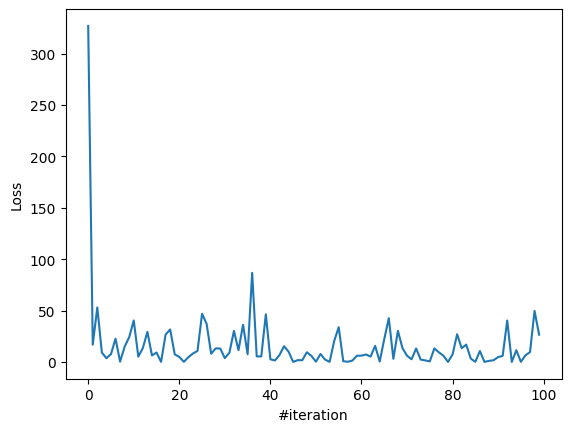

In [153]:
X, y = prepare_data('advertising.csv')

(w1 , w2 , w3 ,b , losses)  = implement_linear_regression(X, y)
print(w1, w2, w3, b)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [154]:
tv = 19.2
radio = 35.9
newspaper = 51.3
X,y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max =50, lr=1e-5)
sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f'predicted sales is {sales}')

predicted sales is 8.176413319549823

In [155]:
def implement_linear_regression_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss_mae(y_hat, y)

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)

    return w1, w2, w3, b, losses

0.07405984066396477 0.15917360263437663 0.017561197559948935 0.13924260940219846


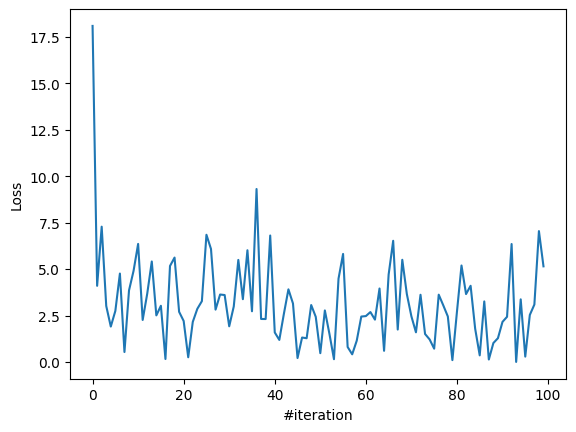

In [156]:
X, y = prepare_data('advertising.csv')

(w1 , w2 , w3 ,b , losses)  = implement_linear_regression_mae(X, y)
print(w1, w2, w3, b)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [157]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    N = len(y_data)


    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss_mse(y_hat, y)
            
            loss_total += loss


            dw1_total += compute_gradient_wi(x1, y, y_hat)
            dw2_total += compute_gradient_wi(x2, y, y_hat)
            dw3_total += compute_gradient_wi(x3, y, y_hat)
            db_total += compute_gradient_b(y, y_hat)

        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        losses.append(loss_total / N)

    return w1, w2, w3, b, losses

0.06710990754044266 0.15756173831487585 0.029619799386084403 0.015537523797089711


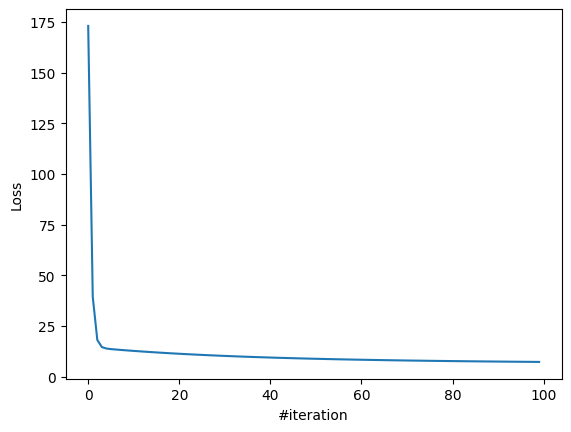

In [158]:
X, y = prepare_data('advertising.csv')

(w1 , w2 , w3 ,b , losses)  = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(w1, w2, w3, b)

plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


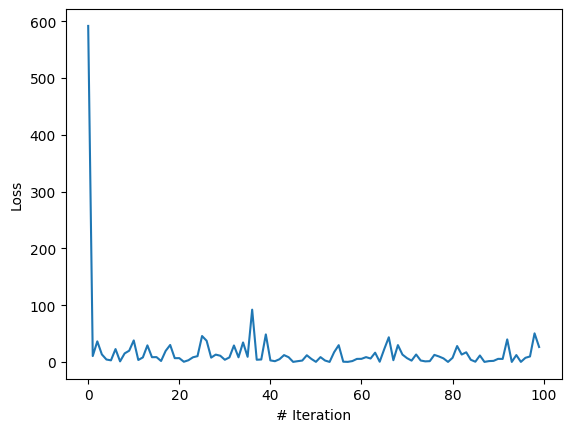

In [161]:
import numpy as np


def get_column(data, index):
    return [row[index] for row in data]


def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y


def initialize_params():
    bias = 0
    return [bias, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

def predict(X_features, weights):
    y_hat = sum([x * w for x, w in zip(X_features, weights)])
    return y_hat


def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [-2 * (y - y_hat) * x_i for x_i in X_features]
    return dl_dweights

def update_weight(weights, dl_dweights, lr):
    updated_weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)]
    return updated_weights


def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    for epoch in range(epoch_max):
        for i in range(N):
            features_i = X_feature[i]
            y = y_output[i]
            
            y_hat = predict(features_i, weights)
            
            loss = compute_loss(y_hat, y)
            
            dl_dweights = compute_gradient_w(features_i, y, y_hat)
            
            weights = update_weight(weights, dl_dweights, lr)
            
            losses.append(loss)
    
    return weights, losses


X, y = prepare_data('advertising.csv')

W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

plt.plot(L[0:100])
plt.xlabel("# Iteration")
plt.ylabel("Loss")
plt.show()


In [162]:
print(L[9999])

31.339223408109948
